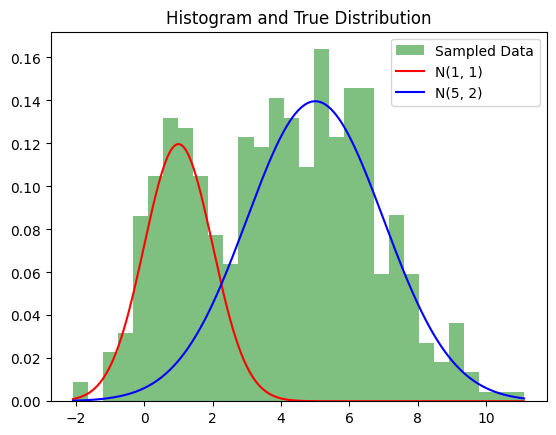

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
n = 500
pi_0, pi_1 = 0.3, 0.7
mu_0, mu_1 = 1, 5
sigma_0, sigma_1 = 1, 2

# Generate mixture components
G = np.random.choice([0, 1], size=n, p=[pi_0, pi_1])
X = np.where(G == 0, np.random.normal(mu_0, sigma_0, n), np.random.normal(mu_1, sigma_1, n))

# Plot histogram of the sample and the true distribution
plt.hist(X, bins=30, density=True, alpha=0.5, color='g', label='Sampled Data')
x = np.linspace(min(X), max(X), 1000)
plt.plot(x, pi_0 * (1 / (np.sqrt(2 * np.pi * sigma_0**2))) * np.exp(-0.5 * ((x - mu_0) / sigma_0)**2), label='N(1, 1)', color='r')
plt.plot(x, pi_1 * (1 / (np.sqrt(2 * np.pi * sigma_1**2))) * np.exp(-0.5 * ((x - mu_1) / sigma_1)**2), label='N(5, 2)', color='b')
plt.title('Histogram and True Distribution')
plt.legend()
plt.show()


##(b) Log-likelihood Formula

Assuming $\mathrm{G}$  is known, the log-likelihood formula is:

\begin{align}
\log L(\theta) = \sum_{i=1}^n \log P(X_i, G_i = g_i | \theta)
\end{align}

For a mixture of normals, this can be expanded as:
\begin{align}
 \log L(\theta) = \sum_{i=1}^n \left[ G_i \log(\pi_1) + (1 - G_i) \log(\pi_0) + G_i \log \mathcal{N}(X_i | \mu_1, \sigma_1) + (1 - G_i) \log \mathcal{N}(X_i | \mu_0, \sigma_0) \right]
\end{align}


##(c) E-step Computations

We need to compute the expected values of the not observed variables
$ \gamma_i := E[G_i | X_i, \theta] $:

\begin{align}
\gamma_i = \frac{\pi_1 \mathcal{N}(X_i | \mu_1, \sigma_1)}{\pi_1 \mathcal{N}(X_i | \mu_1, \sigma_1) + \pi_0 \mathcal{N}(X_i | \mu_0, \sigma_0)}
\end{align}


##(d) M-step Computations

Update equations for the parameters:

1. Updating $\mu_0$ and $\mu_1$:
\begin{align}
\mu_0 = \frac{\sum_{i=1}^n (1 - \gamma_i) X_i}{\sum_{i=1}^n (1 - \gamma_i)}
\end{align}

\begin{align}
\mu_1 = \frac{\sum_{i=1}^n \gamma_i X_i}{\sum_{i=1}^n \gamma_i}
\end{align}

2. Updating $\sigma_0^2$ and $\sigma_1^2$:
\begin{align}
\sigma_0^2 = \frac{\sum_{i=1}^n (1 - \gamma_i) (X_i - \mu_0)^2}{\sum_{i=1}^n (1 - \gamma_i)}
\end{align}
\begin{align}
\sigma_1^2 = \frac{\sum_{i=1}^n \gamma_i (X_i - \mu_1)^2}{\sum_{i=1}^n \gamma_i}
\end{align}

3. Updating $\pi_0$ and $\pi_1$:
\begin{align}
\pi_0 = \frac{1}{n} \sum_{i=1}^n (1 - \gamma_i)
\end{align}
\begin{align}
\pi_1 = \frac{1}{n} \sum_{i=1}^n \gamma_i
\end{align}


In [2]:
# Initialize parameters
mu_0_hat, mu_1_hat = np.random.rand(), np.random.rand()
sigma_0_hat, sigma_1_hat = np.random.rand(), np.random.rand()
pi_0_hat, pi_1_hat = 0.5, 0.5

# Function to compute responsibilities
def compute_gamma(X, mu_0, sigma_0, mu_1, sigma_1, pi_0, pi_1):
    gamma = pi_1 * (1 / (np.sqrt(2 * np.pi * sigma_1**2))) * np.exp(-0.5 * ((X - mu_1) / sigma_1)**2)
    gamma /= (gamma + pi_0 * (1 / (np.sqrt(2 * np.pi * sigma_0**2))) * np.exp(-0.5 * ((X - mu_0) / sigma_0)**2))
    return gamma

# EM algorithm
max_iter = 100
tol = 1e-6
for i in range(max_iter):
    gamma = compute_gamma(X, mu_0_hat, sigma_0_hat, mu_1_hat, sigma_1_hat, pi_0_hat, pi_1_hat)

    # Update parameters
    mu_0_hat_new = np.sum((1 - gamma) * X) / np.sum(1 - gamma)
    mu_1_hat_new = np.sum(gamma * X) / np.sum(gamma)

    sigma_0_hat_new = np.sqrt(np.sum((1 - gamma) * (X - mu_0_hat_new)**2) / np.sum(1 - gamma))
    sigma_1_hat_new = np.sqrt(np.sum(gamma * (X - mu_1_hat_new)**2) / np.sum(gamma))

    pi_0_hat_new = np.mean(1 - gamma)
    pi_1_hat_new = np.mean(gamma)

    # Check convergence
    if np.abs(mu_0_hat - mu_0_hat_new) < tol and np.abs(mu_1_hat - mu_1_hat_new) < tol and \
       np.abs(sigma_0_hat - sigma_0_hat_new) < tol and np.abs(sigma_1_hat - sigma_1_hat_new) < tol and \
       np.abs(pi_0_hat - pi_0_hat_new) < tol and np.abs(pi_1_hat - pi_1_hat_new) < tol:
        break

    mu_0_hat, mu_1_hat = mu_0_hat_new, mu_1_hat_new
    sigma_0_hat, sigma_1_hat = sigma_0_hat_new, sigma_1_hat_new
    pi_0_hat, pi_1_hat = pi_0_hat_new, pi_1_hat_new

# Print final parameters
print(f"Estimated parameters:\nmu_0: {mu_0_hat}, mu_1: {mu_1_hat}\nsigma_0: {sigma_0_hat}, sigma_1: {sigma_1_hat}\npi_0: {pi_0_hat}, pi_1: {pi_1_hat}")


Estimated parameters:
mu_0: 4.956528560386305, mu_1: 0.7050258776830386
sigma_0: 2.049784710144638, sigma_1: 0.8749357329313933
pi_0: 0.7593386799962828, pi_1: 0.24066132000371718


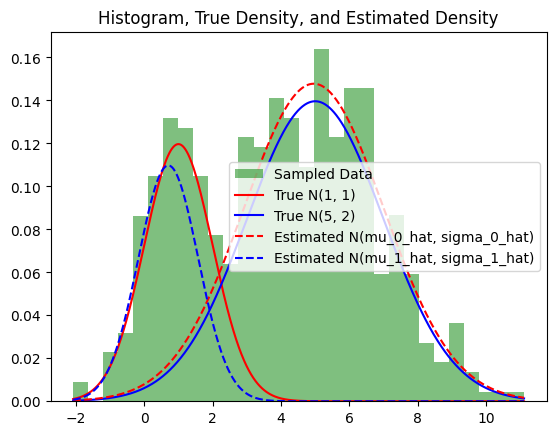

In [3]:
# Plot histogram of the sample
plt.hist(X, bins=30, density=True, alpha=0.5, color='g', label='Sampled Data')

# Plot true density
plt.plot(x, pi_0 * (1 / (np.sqrt(2 * np.pi * sigma_0**2))) * np.exp(-0.5 * ((x - mu_0) / sigma_0)**2), label='True N(1, 1)', color='r')
plt.plot(x, pi_1 * (1 / (np.sqrt(2 * np.pi * sigma_1**2))) * np.exp(-0.5 * ((x - mu_1) / sigma_1)**2), label='True N(5, 2)', color='b')

# Plot estimated density
plt.plot(x, pi_0_hat * (1 / (np.sqrt(2 * np.pi * sigma_0_hat**2))) * np.exp(-0.5 * ((x - mu_0_hat) / sigma_0_hat)**2), label='Estimated N(mu_0_hat, sigma_0_hat)', linestyle='dashed', color='r')
plt.plot(x, pi_1_hat * (1 / (np.sqrt(2 * np.pi * sigma_1_hat**2))) * np.exp(-0.5 * ((x - mu_1_hat) / sigma_1_hat)**2), label='Estimated N(mu_1_hat, sigma_1_hat)', linestyle='dashed', color='b')

plt.title('Histogram, True Density, and Estimated Density')
plt.legend()
plt.show()


##(a) Log-likelihood in Logistic Regression

For logistic regression, the log-likelihood function for $ n $ observations is given by:

$ \ell(\beta) = \sum_{i=1}^n \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right] $

where $ p_i = \frac{1}{1 + \exp(-X_i \beta)} $.


#(b) Compute Hessian of Minus Log-Likelihood

The negative log-likelihood for logistic regression is:

$ -\ell(\beta) = -\sum_{i=1}^n \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right] $

where $ p_i = \frac{1}{1 + \exp(-X_i \beta)} $.

To compute the Hessian matrix $ H $ of the negative log-likelihood, we first need the gradient (first derivative) and then the second derivative.

The gradient of the negative log-likelihood is:

$ \nabla (-\ell(\beta)) = \sum_{i=1}^n (p_i - y_i) X_i $

The Hessian matrix \( H \) is the second derivative, given by:

$ H = \nabla^2 (-\ell(\beta)) = X^T W X $

where $ W $ is a diagonal matrix with entries $ w_i = p_i (1 - p_i) $.

To upper bound the Hessian in terms of matrices, we note that the elements of $ W $ satisfy:

$ 0 < w_i \leq \frac{1}{4} $

because the maximum value of $ p_i (1 - p_i) $ is $ \frac{1}{4} $ when $ p_i = 0.5 $.

Thus, we can write:

$ H \leq \frac{1}{4} X^T X $

This means:

$ H \geq M $

where $ M = \frac{1}{4} X^T X $.


#(c) Majorization Step: Upper Bound on Minus Log-Likelihood

The majorization step involves finding an upper bound on the negative log-likelihood. We use a quadratic approximation around the current estimate $ \beta^{(t)} $.

The negative log-likelihood can be approximated by its second-order Taylor expansion around \( \beta^{(t)} \):

$ -\ell(\beta) \approx -\ell(\beta^{(t)}) - \nabla \ell(\beta^{(t)})^T (\beta - \beta^{(t)}) + \frac{1}{2} (\beta - \beta^{(t)})^T H (\beta - \beta^{(t)}) $

Since $ H \leq \frac{1}{4} X^T X $, we can use:

$ -\ell(\beta) \leq -\ell(\beta^{(t)}) - \nabla \ell(\beta^{(t)})^T (\beta - \beta^{(t)}) + \frac{1}{2} (\beta - \beta^{(t)})^T \left( \frac{1}{4} X^T X \right) (\beta - \beta^{(t)}) $

Simplifying, we get the upper bound:

$ -\ell(\beta) \leq -\ell(\beta^{(t)}) - \nabla \ell(\beta^{(t)})^T (\beta - \beta^{(t)}) + \frac{1}{8} (\beta - \beta^{(t)})^T X^T X (\beta - \beta^{(t)}) $


# Minimization Step: Updates of the Parameters

To minimize the upper bound derived in part (c), we solve the following quadratic optimization problem. The update formula for the parameters is obtained by setting the gradient of the upper bound to zero.

The quadratic approximation of the negative log-likelihood is:

$ Q(\beta | \beta^{(t)}) = -\ell(\beta^{(t)}) - \nabla \ell(\beta^{(t)})^T (\beta - \beta^{(t)}) + \frac{1}{8} (\beta - \beta^{(t)})^T X^T X (\beta - \beta^{(t)}) $

To find the minimum, we take the derivative with respect to $ \beta $ and set it to zero:

$ \nabla Q(\beta | \beta^{(t)}) = - \nabla \ell(\beta^{(t)}) + \frac{1}{4} X^T X (\beta - \beta^{(t)}) = 0 $

Solving for $ \beta $:

$ \beta^{(t+1)} = \beta^{(t)} - 4 \left(X^T X\right)^{-1} \nabla \ell(\beta^{(t)}) $


# Advantages and Disadvantages of Using MM Compared to IWLS (Iterative Weighted Least Squares/Newton-Raphson)

##### Advantages:

1. **Stability**:
   - The MM algorithm can be more stable than IWLS/Newton-Raphson, particularly when the Hessian is poorly conditioned or near-singular.

2. **Simplicity**:
   - The MM algorithm can be easier to implement since it only requires computing an upper bound and does not need to invert the Hessian matrix directly.

##### Disadvantages:

1. **Convergence Speed**:
   - The MM algorithm may converge more slowly compared to IWLS/Newton-Raphson, especially if the upper bound is not tight.

2. **Accuracy**:
   - The approximation used in MM might lead to less accurate parameter estimates if the majorization step is not well-calibrated.


In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.special import expit  # Sigmoid function

# Generate synthetic data for logistic regression
np.random.seed(0)
n_samples = 1000
n_features = 10
X = np.random.randn(n_samples, n_features)
true_beta = np.random.randn(n_features)
p = expit(X.dot(true_beta))
y = np.random.binomial(1, p, size=n_samples)

# MM Algorithm for Logistic Regression
def logistic_regression_mm(X, y, max_iter=100, tol=1e-6):
    n, d = X.shape
    beta = np.zeros(d)

    for iteration in range(max_iter):
        p = expit(X.dot(beta))
        W = np.diag(p * (1 - p))
        gradient = X.T.dot(y - p)
        hessian_approx = (1 / 4) * X.T.dot(X)  # Upper bound approximation

        # Update step
        beta_new = beta + np.linalg.inv(hessian_approx).dot(gradient)

        # Check convergence
        if np.linalg.norm(beta_new - beta, ord=1) < tol:
            break

        beta = beta_new

    return beta

# Fit using MM algorithm
beta_mm = logistic_regression_mm(X, y)

# Predict and calculate accuracy for MM algorithm
y_pred_mm = (expit(X.dot(beta_mm)) >= 0.5).astype(int)
accuracy_mm = accuracy_score(y, y_pred_mm)

# Fit using scikit-learn's LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, y)
y_pred_sklearn = model.predict(X)
accuracy_sklearn = accuracy_score(y, y_pred_sklearn)

print(f'Accuracy (MM algorithm): {accuracy_mm:.4f}')
print(f'Accuracy (scikit-learn): {accuracy_sklearn:.4f}')


Accuracy (MM algorithm): 0.8230
Accuracy (scikit-learn): 0.8280
